<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/InceptionV3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import os
from glob import glob
import matplotlib.pyplot as plt

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
IMAGE_SIZE = [224, 224]
train_path='/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train'
test_path='/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled'

In [117]:
images = glob(os.path.join(train_path, '*/*.jpg'))
total_images = len(images)
print('Total images:', total_images)

Total images: 1600


In [118]:
image_count = []
class_names = []

for folder in os.listdir(os.path.join(train_path)):
    folder_num = len(os.listdir(os.path.join(train_path, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)

BrownSpot            400
Hispa                400
Healthy              400
LeafBlast            400


In [119]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [120]:
for layer in inception.layers:
    layer.trainable = False

In [121]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/*')

In [122]:
x = Flatten()(inception.output)

In [123]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [124]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 111, 111, 32) 96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 111, 111, 32) 0           batch_normalization_658[0][0]    
____________________________________________________________________________________________

In [125]:
LEARNING_RATE = 0.001
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
  metrics=['accuracy']
)

In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [127]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation', 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=(224,224),
    batch_size=32)

Found 492 images belonging to 4 classes.


In [128]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                  target_size = (224, 224),
                                  batch_size = 32,
                                  class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [129]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3355 images belonging to 4 classes.


In [131]:
r = model.fit_generator(
  training_set,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_generator)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 649s 13s/step - loss: 6.9255 - accuracy: 0.3764 - val_loss: 3.9139 - val_accuracy: 0.4553
Epoch 2/20
50/50 [==============================] - 355s 7s/step - loss: 3.8864 - accuracy: 0.4926 - val_loss: 3.1754 - val_accuracy: 0.4268
Epoch 3/20
50/50 [==============================] - 355s 7s/step - loss: 2.3642 - accuracy: 0.5679 - val_loss: 4.5988 - val_accuracy: 0.4939
Epoch 4/20
50/50 [==============================] - 355s 7s/step - loss: 2.6083 - accuracy: 0.6059 - val_loss: 3.6553 - val_accuracy: 0.4593
Epoch 5/20
50/50 [==============================] - 354s 7s/step - loss: 2.0398 - accuracy: 0.6461 - val_loss: 3.4104 - val_accuracy: 0.5081
Epoch 6/20
50/50 [==============================] - 353s 7s/step - loss: 2.5399 - accuracy: 0.6254 - val_loss: 3.0034 - val_accuracy: 0.5224
Epoch 7/20
50/50 [==============================] - 353s 7s/step - loss: 1.9027 - accuracy: 0.6878 - val_loss: 5.8841 - val_accuracy: 0.4065
Epoch 8/20
5

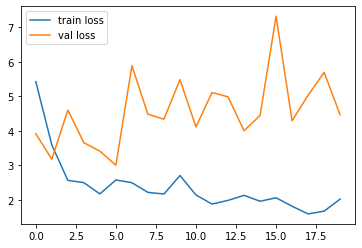

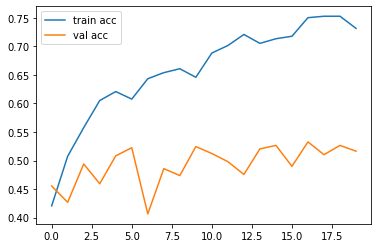

<Figure size 432x288 with 0 Axes>

In [132]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [140]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('ricemodel_inception.h5')

In [149]:
img=image.load_img('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation/Healthy/IMG_20190419_103002.jpg',target_size=(224,224))

In [150]:
x=image.img_to_array(img)
x

array([[[222., 227., 255.],
        [229., 236., 255.],
        [206., 213., 255.],
        ...,
        [207., 214., 255.],
        [200., 205., 247.],
        [206., 213., 255.]],

       [[229., 236., 255.],
        [225., 231., 255.],
        [217., 223., 255.],
        ...,
        [207., 216., 255.],
        [216., 222., 255.],
        [204., 209., 251.]],

       [[223., 228., 255.],
        [221., 226., 255.],
        [221., 226., 255.],
        ...,
        [206., 213., 255.],
        [209., 214., 255.],
        [212., 217., 255.]],

       ...,

       [[225., 231., 255.],
        [229., 236., 255.],
        [217., 223., 255.],
        ...,
        [202., 209., 255.],
        [206., 211., 253.],
        [214., 220., 254.]],

       [[217., 223., 255.],
        [228., 235., 254.],
        [228., 234., 255.],
        ...,
        [216., 222., 255.],
        [206., 211., 253.],
        [206., 211., 253.]],

       [[222., 227., 255.],
        [220., 225., 255.],
        [228., 2

In [151]:
x.shape

(224, 224, 3)

In [152]:
x=x/255

In [153]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [154]:
model.predict(img_data)

array([[2.7628299e-02, 9.6829468e-01, 2.2061402e-04, 3.8564173e-03]],
      dtype=float32)

In [155]:
a=np.argmax(model.predict(img_data), axis=1)
print('Detected: {}'.format(class_names[3]))

Detected: LeafBlast


In [158]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(test_path, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {class_names[class_idx]: probabilities[class_idx]}

SOURCE: class: Healthy, file: Healthy/IMG_20190424_131456.jpg
PREDICTED: class: Hispa, confidence: 0.999994


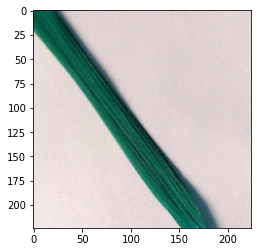

<Figure size 432x288 with 0 Axes>

SOURCE: class: BrownSpot, file: BrownSpot/IMG_20190420_194920.jpg
PREDICTED: class: LeafBlast, confidence: 0.999208


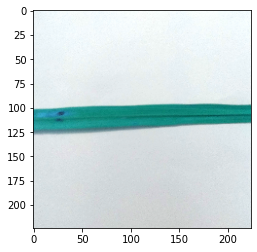

SOURCE: class: BrownSpot, file: BrownSpot/IMG_20190419_113157.jpg
PREDICTED: class: LeafBlast, confidence: 0.950594


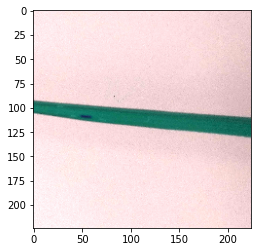

<Figure size 432x288 with 0 Axes>

SOURCE: class: Healthy, file: Healthy/IMG_20190419_171208.jpg
PREDICTED: class: Healthy, confidence: 0.827755


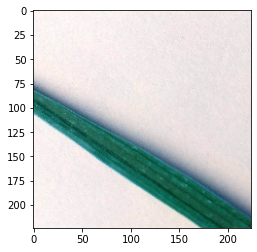

<Figure size 432x288 with 0 Axes>

SOURCE: class: LeafBlast, file: LeafBlast/IMG_20190420_190829.jpg
PREDICTED: class: LeafBlast, confidence: 0.935934


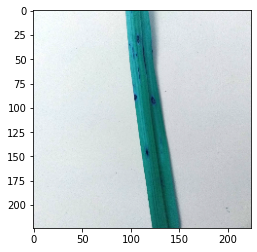

<Figure size 432x288 with 0 Axes>

In [161]:
for idx, filename in enumerate(random.sample(test_set.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()